In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f'x_train shape: ', x_train.shape)
print(f'y_train shape: ', y_train.shape)
print(f'x_test shape: ', x_test.shape)
print(f'y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


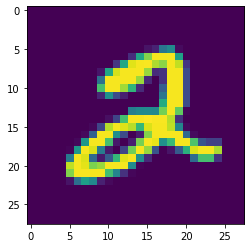

In [ ]:
plt.imshow(x_train[5])

In [ ]:
y_train[5]

2

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)
print(f'y_train_enc example{y_train_enc[5]} for y_train: {y_train[5]}')
print(f'y_test_enc example{y_test_enc[5]} for y_test: {y_test[5]}')

y_train_enc example[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] for y_train: 2
y_test_enc example[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] for y_test: 1


###Flattening given 28*28 greyscale image to a vector 

In [ ]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000,784))

In [ ]:
x_train_reshaped.shape

(60000, 784)

In [ ]:
print(set(x_train_reshaped[5]))

{0, 3, 4, 5, 6, 7, 10, 13, 14, 15, 16, 17, 18, 21, 22, 23, 25, 26, 29, 30, 31, 33, 35, 36, 37, 40, 49, 53, 54, 58, 59, 60, 65, 66, 72, 73, 77, 78, 87, 88, 89, 93, 96, 100, 105, 106, 110, 116, 117, 121, 122, 124, 125, 126, 128, 129, 135, 136, 143, 146, 151, 152, 157, 163, 167, 170, 173, 178, 179, 180, 181, 184, 194, 200, 202, 203, 205, 207, 208, 211, 216, 217, 220, 223, 224, 227, 228, 231, 232, 239, 241, 242, 243, 244, 245, 247, 252, 253, 255}


###Normalizing pixel values

In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

e=1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + e)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + e)

In [ ]:
print(set(x_train_norm[5]))

{-0.10587612575604877, 0.8487171801488835, 1.1287312165476637, 1.4978406281642376, 2.2233315406519862, 2.7833596134495466, 1.4342010744372422, 2.681536327486354, 2.3760664695967755, 2.045140790216399, 2.668808416740955, 2.719720059722551, 2.694264238231753, 0.75962180493109, -0.14405985799224608, 1.17964285952926, 2.7960875241949457, 2.1596919869249906, 1.8669500397808114, 0.912356733875879, 0.02140298169794222, -0.38589016215482896, -0.22042732246464067, 1.5742080926366322, 2.210603629906587, 1.917861682762408, 2.2615152728881838, 2.6560805059955555, 0.6959822512040945, -0.4240738943910262, -0.25861105470083795, -0.33497851917323257, -0.05496448277445237, 0.3141449288421215, -0.29679478693703526, 2.4142502018329726, 1.7778546645630178, -0.09314821501064967, 0.505063590023108, 2.465161844814569, 2.1215082546887936, -0.13133194724684696, 0.2632332858605251, 1.8796779505262107, 2.5160734877961657, 1.294194056237852, 0.03413089244334132, 2.6178967737593584, 2.325154826615179, 0.7087101619

###Create a Neural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='sgd',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


###Training the model

In [ ]:
model.fit(x_train_norm, y_train_enc, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3783 - accuracy: 0.8896
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1884 - accuracy: 0.9450
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1442 - accuracy: 0.9586
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1182 - accuracy: 0.9653


###Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_enc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1238 - accuracy: 0.9629


###Result

In [ ]:
preds = model.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


In [ ]:
preds.shape

(10000, 10)

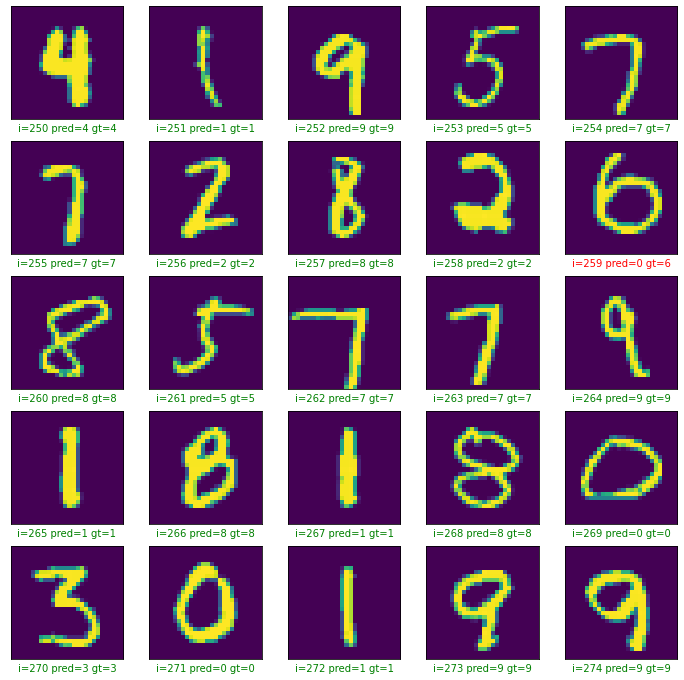

In [ ]:
plt.figure(figsize=(12,12))

start_loc = 250
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_loc+i])
  gt = y_test[start_loc+i]

  color = 'green'
  if pred != gt:
    color = 'red'

  plt.xlabel(f'i={start_loc+i} pred={pred} gt={gt}', color=color)
  plt.imshow(x_test[start_loc+i])
plt.show()